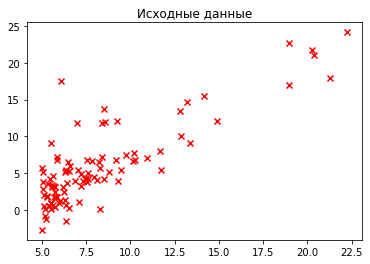

Значение функции стоимости при theta = [0, 0]:  32.072733877455654


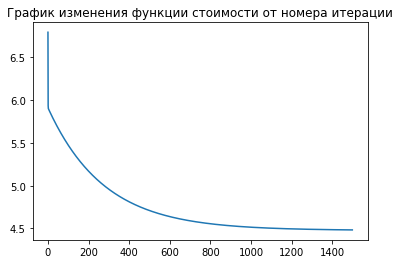

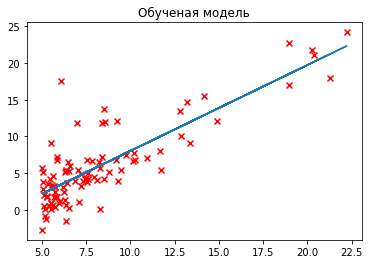

In [1]:
import numpy as np
from matplotlib import pyplot as plt


def compute_hypothesis(X, theta):
    return np.matmul(X, theta)


def compute_cost(X, y, theta):
    m = X.shape[0]  # количество примеров в выборке
    # ВАШ КОД ЗДЕСЬ

    return 1 / (2 * m) * sum((compute_hypothesis(X, theta) - y) ** 2)

    # ==============


def gradient_descend(X, y, theta, alpha, num_iter):
    history = list()

    m = X.shape[0]  # количество примеров в выборке

    for i in range(num_iter):

        # ВАШ КОД ЗДЕСЬ

        theta_temp = theta
        theta_temp[0] = theta_temp[0] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, 0]) / m
        theta_temp[1] = theta_temp[1] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, 1]) / m
        theta = theta_temp

        # =====================

        history.append(compute_cost(X, y, theta))
    return history, theta


def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)


X, y = load_data('lab1data1.txt')

plt.title('Исходные данные')
plt.scatter(X[:, 1], y, c='r', marker='x')
plt.show()

print('Значение функции стоимости при theta = [0, 0]: ', compute_cost(X, y, np.array([0, 0])))

history, theta = gradient_descend(X, y, np.array([0, 0], float), 0.01, 1500)

plt.title('График изменения функции стоимости от номера итерации')
plt.plot(range(len(history)), history)
plt.show()

plt.title('Обученая модель')
plt.scatter(X[:, 1], y, c='r', marker='x')
plt.plot(X[:, 1], compute_hypothesis(X, theta))
plt.show()


In [36]:
import numpy as np
from matplotlib import pyplot as plt

In [37]:
def compute_hypothesis(X, theta):
    # extendedX = X.concat(np.ones(X.shape[0]))
    return X @ theta

In [38]:
def compute_cost(X, y, theta):
    m = X.shape[0]  # количество примеров в выборке
    # ВАШ КОД ЗДЕСЬ

    return 1 / (2 * m) * sum((compute_hypothesis(X, theta) - y) ** 2)

    # ==============

In [39]:
def gradient_descend(X, y, theta, alpha, num_iter):
    history = list()
    m = X.shape[0]  # количество примеров в выборке
    n = X.shape[1]  # количество признаков с фиктивным
    for i in range(num_iter):

        # ВАШ КОД ЗДЕСЬ
        theta = theta - alpha * (compute_hypothesis(X, theta) - y).dot(X) / m
        # =====================

        history.append(compute_cost(X, y, theta))
    return history, theta

In [40]:
def scale_features(X):
    # ВАШ КОД ЗДЕСЬ
    eps = 1e-100
    X_scaled = (X - X.mean(axis=0)) / (X.std(axis=0) + eps)
    X_scaled[:, 0] = np.ones(X_scaled.shape[0])
    return X_scaled
    # =====================

In [41]:
def normal_equation(X, y):
    # ВАШ КОД ЗДЕСь
    return np.linalg.pinv(X.T @ X) @ X.T @ y
    # =====================

In [42]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

In [43]:
X, y = load_data('lab1data2.txt')
init_theta = np.array([0, 0, 0], float)
history, theta = gradient_descend(X, y, init_theta, 0.01, 1500)

/tmp/ipykernel_642/3583769415.py:5: RuntimeWarning: overflow encountered in square
  return 1 / (2 * m) * sum((compute_hypothesis(X, theta) - y) ** 2)
/tmp/ipykernel_642/3412815258.py:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * (compute_hypothesis(X, theta) - y).dot(X) / m


In [44]:
t = compute_hypothesis(X, np.array([0, 0, 0], float))

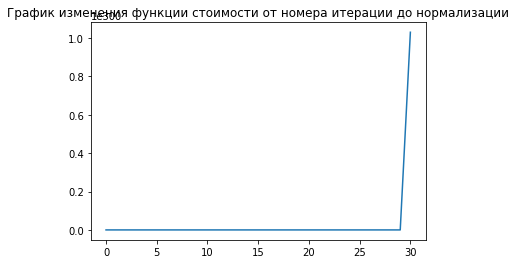

In [45]:
plt.title('График изменения функции стоимости от номера итерации до нормализации')
plt.plot(range(len(history)), history)
plt.show()

In [46]:
X.shape

(47, 3)

In [47]:
normalized_X = scale_features(X)

history, theta = gradient_descend(normalized_X, y, np.array([0, 0, 0], float), 0.01, 1500)

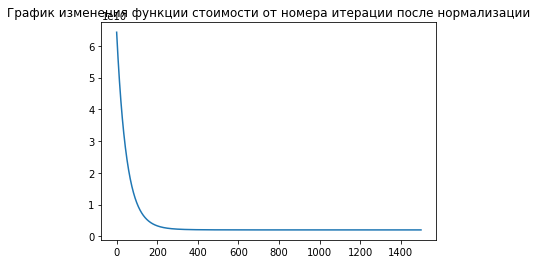

In [48]:
plt.title('График изменения функции стоимости от номера итерации после нормализации')
plt.plot(range(len(history)), history)
plt.show()

In [49]:
theta_solution = normal_equation(normalized_X, y)
print(f'theta, посчитанные через градиентный спуск: {theta}, \nчерез нормальное уравнение: {theta_solution}')

theta, посчитанные через градиентный спуск: [340412.56301439 109370.05670466  -6500.61509507], 
через нормальное уравнение: [340412.65957447 109447.79646964  -6578.35485416]
